Import libraries and load the data

In [ ]:
importimport pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# load the customer data into a DataFrame
customer_df = pd.read_csv('Mall_Customers.csv')
# Check the first 5 rows
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Explore the data

Text(0, 0.5, 'Spending Score (1-100)')

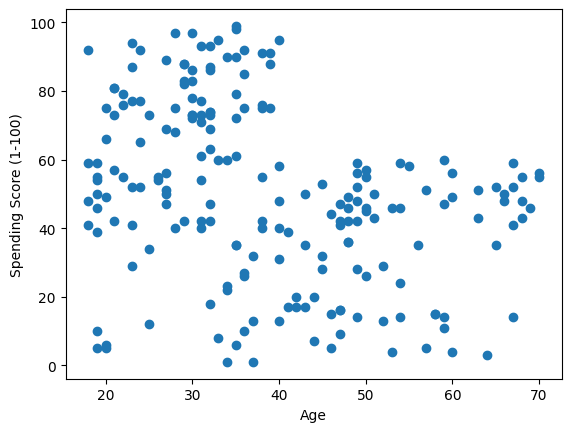

In [ ]:
plt.scatter(customer_df["Age"], customer_df["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

Text(0, 0.5, 'Annual Income (k$)')

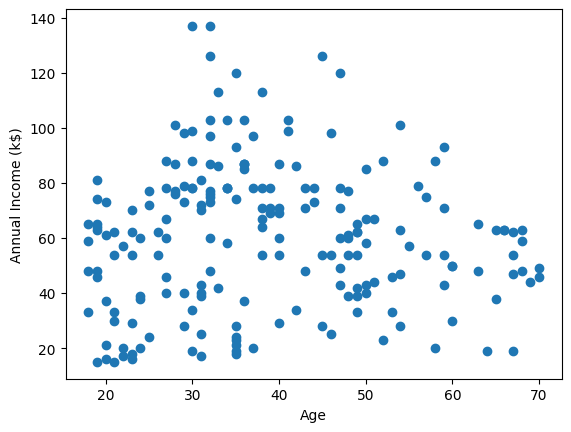

In [ ]:
plt.scatter(customer_df["Age"], customer_df["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

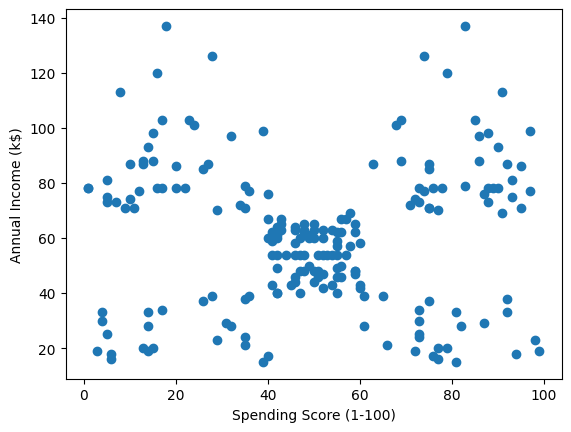

In [ ]:
plt.scatter(customer_df["Spending Score (1-100)"], customer_df["Annual Income (k$)"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

In [ ]:
# Check for null values
customer_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
customer_df['Genre']=customer_df['Genre'].map({'Male':1,'Female':0})

In [ ]:
for i in customer_df.columns:
  customer_df[i].fillna(value=customer_df[i].mean(),inplace=True)

Get the relevant columns for clustering

In [ ]:
print(customer_df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [ ]:
relevant_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
customer_df = customer_df[relevant_cols]

Data Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customer_df)
scaled_data = scaler.transform(customer_df)

Determine the best number of cluster

In [ ]:
def find_best_clusters(df, maximum_K): 
    clusters_centers = []
    k_values = []
    for k in range(1, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
    return clusters_centers, k_values

In [ ]:
def generate_elbow_plot(clusters_centers, k_values):
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

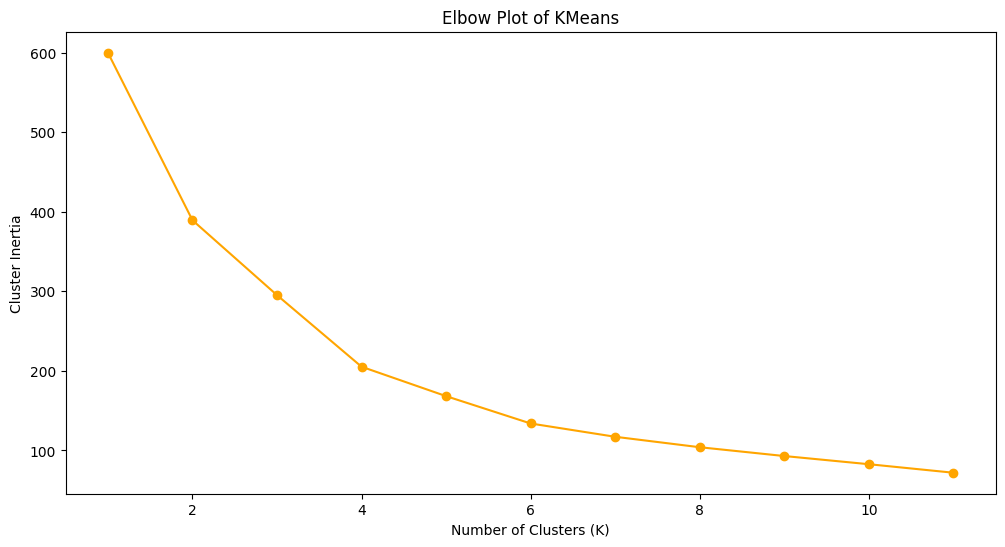

In [ ]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)
generate_elbow_plot(clusters_centers, k_values)

Create the final KMeans model

In [ ]:
kmeans_model = KMeans(n_clusters = 5)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
customer_df["clusters"] = kmeans_model.labels_
customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,0
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,0


Visualize the clusters

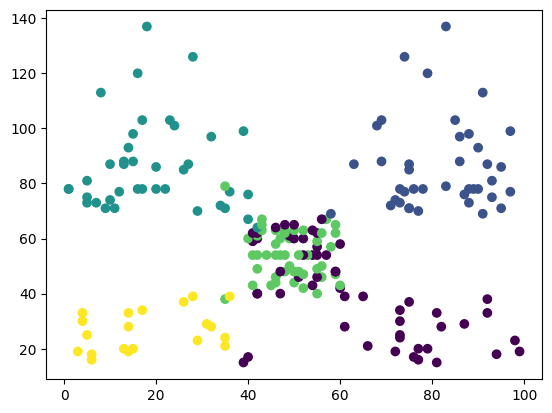

In [ ]:
plt.scatter(customer_df["Spending Score (1-100)"],customer_df["Annual Income (k$)"],c=customer_df["clusters"])